In [ ]:
def stringToList(input):
  lst = []
  for i in input:
    l = list(map(float, i.split(" ")))
    lst.append(l)
  return lst

In [ ]:
def moodNamePrintFromLabel(n):
  if n == 0: result = 'Angry '
  elif n == 1: result = 'Disgust '
  elif n == 2: result = 'Fear'
  elif n == 3: result = 'Happy'
  elif n == 4: result = 'Sad'
  elif n == 5: result = 'Surprise'
  elif n == 6: result = 'Neutral'
  return result


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/ML Project/Datasets/train.csv') # train data folder link
test_data = pd.read_csv('/content/drive/MyDrive/ML Project/Datasets/test.csv') # test data folder link

In [ ]:
X = data['pixels']
Y = np.array(data['emotion'])

testDataset_X = np.array(test_data['pixels'])

X = np.array(stringToList(X))/255.0
X = np.reshape(X, (28709, 48,48,1))

testDataset_X = np.array(stringToList(testDataset_X))
testDataset_X = np.reshape(testDataset_X, (7178,48,48,1)) /255.0


In [ ]:
print(X.shape)
print(Y.shape)

(28709, 48, 48, 1)
(28709,)


In [ ]:
from sklearn.model_selection import train_test_split
x_trainDataset, x_testDataset, y_trainDataset, y_testDataset = train_test_split(X, Y, test_size = 0.2)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization

In [ ]:
model = Sequential()
#1st convo
model.add(Conv2D(96, (3,3), input_shape = (48,48,1)))
model.add(Activation('relu'))
#polling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())


#2nd convo
model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
#polling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

#3rd convo
model.add(Conv2D(384, (3,3)))
model.add(Activation('relu'))
#polling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

#4th convo
model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
#polling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())




#passing through dense layer
model.add(Flatten())

#1st dense layer
model.add(Dense(1024))
model.add(Activation('relu'))



#dropout
model.add(BatchNormalization())
model.add(Dropout(0.4))


#2nd dense layer
model.add(Dense(1024))
model.add(Activation('relu'))




#dropout
model.add(BatchNormalization())
model.add(Dropout(0.4))


#3rd dense layer
model.add(Dense(256))
model.add(Activation('relu'))

#4th dense layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#dropout
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Activation('relu'))


#output layer
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ['sparse_categorical_accuracy'])
model.fit(x_trainDataset, y_trainDataset, batch_size=32, epochs=13, validation_split=0.1)

Epoch 1/13
646/646 [==============================] - 30s 43ms/step - loss: 1.8202 - sparse_categorical_accuracy: 0.3075 - val_loss: 2.2717 - val_sparse_categorical_accuracy: 0.1241
Epoch 2/13
646/646 [==============================] - 27s 42ms/step - loss: 1.4067 - sparse_categorical_accuracy: 0.4593 - val_loss: 1.2932 - val_sparse_categorical_accuracy: 0.5054
Epoch 3/13
646/646 [==============================] - 27s 42ms/step - loss: 1.2587 - sparse_categorical_accuracy: 0.5245 - val_loss: 1.2238 - val_sparse_categorical_accuracy: 0.5303
Epoch 4/13
646/646 [==============================] - 27s 42ms/step - loss: 1.1622 - sparse_categorical_accuracy: 0.5620 - val_loss: 1.2299 - val_sparse_categorical_accuracy: 0.5398
Epoch 5/13
646/646 [==============================] - 27s 42ms/step - loss: 1.0581 - sparse_categorical_accuracy: 0.6043 - val_loss: 1.2543 - val_sparse_categorical_accuracy: 0.5324
Epoch 6/13
646/646 [==============================] - 27s 42ms/step - loss: 0.9538 - spars

In [ ]:
model.save('/content/drive/MyDrive/ML Project/AI/model.h5') # Where to save the model (folder link)

In [ ]:
from keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/ML Project/AI/model.h5') # saved model file link

In [ ]:
score = loaded_model.evaluate(x_testDataset, y_testDataset, verbose=1)

180/180 [==============================] - 3s 16ms/step - loss: 1.6154 - sparse_categorical_accuracy: 0.5510


In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


def videoToMoodDetection(video_path):
  #video_cap = cv2.VideoCapture(0)
  video_cap = cv2.VideoCapture(video_path)

  while (video_cap.isOpened()):
    ret, frame = video_cap.read()

    BW_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(BW_img, 1.3, 5)

    for (x,y,w,h) in faces:
      pxl_lst = []
      for i in range(y, y+h):
        lst = []
        for j in range(x, x+w):
          lst.append(BW_img[i][j])
        pxl_lst.append(lst)
      face_emotion = np.array(pxl_lst)
      
      
      resized_img = cv2.resize(face_emotion, (48,48), interpolation = cv2.INTER_AREA)

      #printing the 48*48 pixel images which will be passed to the model
      cv2_imshow(resized_img)
      
      #resize for passing to the model
      resized_img = np.reshape(resized_img,(1,48,48,1))/255.0

      #passing to model
      result = np.argmax(loaded_model.predict(resized_img), axis=-1)
      if result is not None:
        print(moodNamePrintFromLabel(result))
  


def imageToMoodDetection(img_path):

  img = cv2.imread(img_path)

  BW_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  faces = face_cascade.detectMultiScale(BW_img, 1.3, 3)

  for (x,y,w,h) in faces:
      pxl_lst = []
      for i in range(y, y+h):
        lst = []
        for j in range(x, x+w):
          lst.append(BW_img[i][j])
        pxl_lst.append(lst)
      face_emotion = np.array(pxl_lst)
      face_emotion = np.reshape(face_emotion,(h,w,))
  
      resized_img = cv2.resize(face_emotion, (48,48), interpolation = cv2.INTER_AREA)
      cv2_imshow(resized_img)
      print(resized_img.shape)
      resized_img = np.reshape(resized_img,(1,48,48,1))/255.0

      #passing to model
      result = np.argmax(loaded_model.predict(resized_img), axis=-1)
      if result is not None:
        print(moodNamePrintFromLabel(result))

  

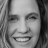

(48, 48)
Happy


In [ ]:
imageToMoodDetection('/content/drive/MyDrive/ML Project/AI/Mood.jpg') # tesing with imgae (image link)

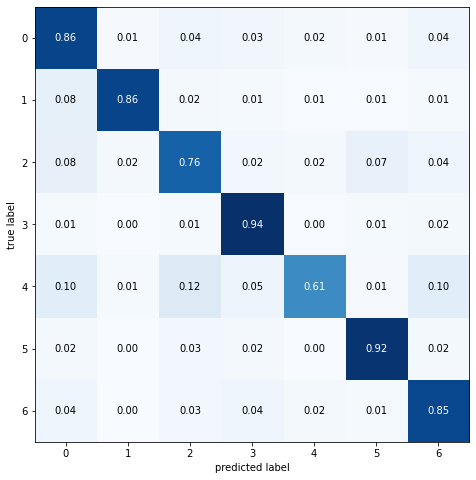

In [ ]:
# Creating Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

def prepare_dataset(dataset):
    dataArray = np.zeros(shape=(len(dataset), 48, 48, 1))
    dataLabel = np.array(list(map(int, dataset['emotion'])))

    for i, row in enumerate(dataset.index):
        data = np.fromstring(dataset.loc[row, 'pixels'], dtype=int, sep=' ')
        data = np.reshape(data, (48, 48)) 
        dataArray[i, :, :, 0] = data / 255

    return dataArray, dataLabel



dataset = pd.read_csv('/content/drive/MyDrive/ML Project/Datasets/train.csv')
test_dataset, test_dataset_labels = prepare_dataset(dataset)
test_probable = model.predict(test_dataset)
test_predicted = np.argmax(test_probable, axis=1)


#Ploting Confusion matrix
confusionMatrix = confusion_matrix(test_dataset_labels, test_predicted)
fig, ax = plot_confusion_matrix(conf_mat=confusionMatrix,show_normed=True,show_absolute=False,figsize=(15, 8))
fig.show()
